## scikitlearn 패키지를 활용한 선형회귀(Linear Regression)

In [44]:
# 직선의 방정식 : y = a*x + b
import numpy as np
np.random.seed(0)
y = np.arange(100)

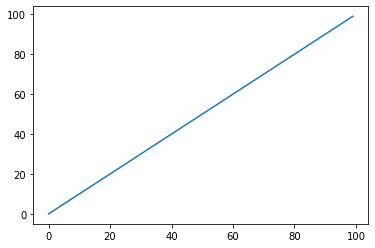

In [45]:
import matplotlib.pyplot as plt

plt.plot(y)

In [46]:
rd = np.random.randint(-15,15, 100)
y = y + rd
y

array([ -3,   1,   8, -12,  -8,  17,  -6,  -1,   2,  13,  16,  14,   1,
        21,   5,  24,  25,  14,  29,   5,  11,  13,  30,  22,  33,  27,
        16,  37,  26,  22,  24,  36,  36,  34,  38,  25,  36,  37,  23,
        42,  28,  50,  44,  47,  58,  49,  50,  46,  40,  34,  36,  45,
        62,  38,  49,  60,  64,  45,  54,  62,  68,  74,  49,  48,  49,
        54,  72,  57,  59,  62,  75,  73,  72,  62,  68,  70,  87,  86,
        64,  65,  72,  75,  92,  71,  75,  93,  82,  86,  91, 101,  75,
        90,  80,  99,  91, 105,  91, 102,  94,  88])

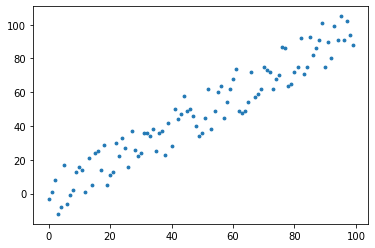

In [47]:
x = np.arange(100)
plt.scatter(x, y, s=8)

In [48]:
x_train = x[:80]
y_train = y[:80]

x_test = x[-20:]
y_test = y[-20:]

In [49]:
x_train.shape   # (80,)

(80,)

In [50]:
x_train = x_train.reshape(-1, 1)

In [51]:
x_train.shape   # (80, 1)

(80, 1)

In [52]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

In [53]:
linreg.fit(x_train, y_train)

LinearRegression()

In [54]:
linreg.coef_, linreg.intercept_

(array([0.96024379]), -0.32962962962962195)

In [55]:
linreg.predict(x_test.reshape(-1, 1))

array([76.48987342, 77.45011721, 78.41036099, 79.37060478, 80.33084857,
       81.29109236, 82.25133615, 83.21157993, 84.17182372, 85.13206751,
       86.0923113 , 87.05255509, 88.01279887, 88.97304266, 89.93328645,
       90.89353024, 91.85377403, 92.81401782, 93.7742616 , 94.73450539])

In [56]:
linreg.score(x_test.reshape(-1,1), y_test)

0.32248397967548326

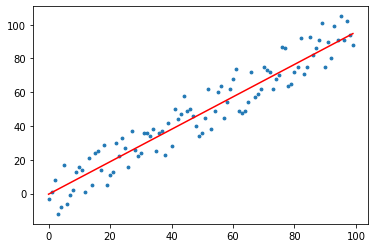

In [57]:
plt.scatter(x, y, s=8)

a = linreg.coef_
b = linreg.intercept_
y2 = a*x + b

plt.plot(x,y2,'r')

In [58]:
linreg.predict([[150],[200]])

array([143.70693858, 191.71912799])

## 기울기 0.5,  절편 20인 데이터셋 회귀분석

In [85]:
np.random.seed(0)
x = np.arange(100)
y = 0.5*x + 20
noise = np.random.randint(-10, 10, 100)
y2 = y + noise

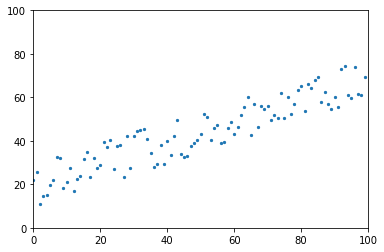

In [86]:
#plt.ylim(0,100)
plt.axis([0,100,0,100])
plt.scatter(x, y2, s=5)

In [87]:
x_train = x[:80]
x_test = x[-20:]

y_train = y2[:80]
y_test = y2[-20:]

In [88]:
X_train = x_train.reshape(-1, 1)
X_train.shape

(80, 1)

In [89]:
X_test = x_test.reshape(-1,1)
X_test.shape

(20, 1)

In [90]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

In [91]:
linreg.fit(X_train,y_train)

LinearRegression()

In [92]:
linreg.coef_, linreg.intercept_

(array([0.46897562]), 20.162962962962965)

In [93]:
linreg.score(X_test, y_test)

-0.06678507357980501

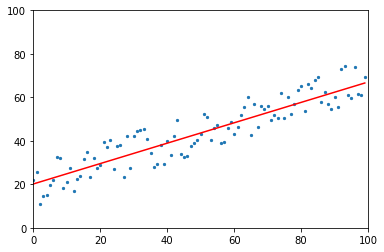

In [94]:
a = linreg.coef_
b = linreg.intercept_

pred_y = a*x + b

plt.axis([0,100,0,100])
plt.scatter(x, y2, s=5)
plt.plot(x, pred_y,'r')
plt.show()

In [95]:
linreg.predict([[1000]])

array([489.13858415])

In [126]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100, n_features=3, random_state=0, noise=10.0, bias=100.0
)

In [127]:
X.shape

(100, 3)

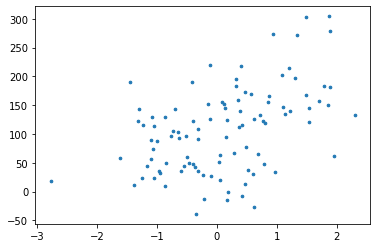

In [128]:
X[:,0]   # x1
plt.scatter(X[:,0], y, s=7)

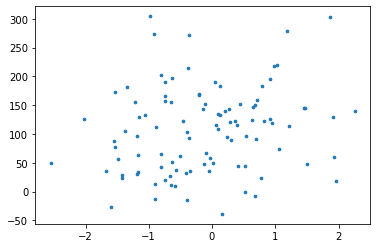

In [129]:
plt.scatter(X[:,1], y, s=7)

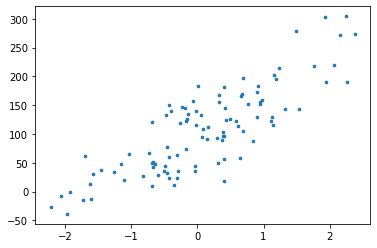

In [130]:
plt.scatter(X[:,2], y, s=7)

In [157]:
# 상관계수 : 
np.corrcoef(X[:,0], y)  # 0.46867824
np.corrcoef(X[:,1], y)  # 0.19036768
np.corrcoef(X[:,2], y)  # 0.83000816

array([[1.        , 0.83000816],
       [0.83000816, 1.        ]])

In [158]:
X_train = X[:80,:]
y_train = y[:80]

X_test = X[-20:,:]
y_test = y[-20:]

In [132]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression()

In [133]:
linreg.coef_, linreg.intercept_

(array([40.10623988,  7.55320588, 61.5175415 ]), 97.95603668916246)

In [134]:
linreg.score(X_test, y_test)

0.9824439177312566

In [159]:
w1 = linreg.coef_[0]
w2 = linreg.coef_[1]
w3 = linreg.coef_[2]
b = linreg.intercept_

pred_y = w1*X[:,0] + w2*X[:,1] + w3*X[:,2] + b


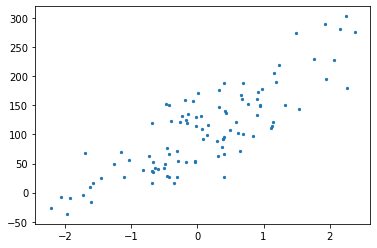

In [161]:
plt.scatter(X[:,2], pred_y, s=5)

In [163]:
linreg.predict(X_test[0, np.newaxis]), y_test[0]

(array([26.63441615]), 23.57301618394716)

In [164]:
linreg.predict(X_test[1, np.newaxis]), y_test[1]

(array([176.85515208]), 166.92141594525745)

In [165]:
linreg.predict(X_test[2, np.newaxis]), y_test[2]

(array([123.75440115]), 139.79157904926882)

In [166]:
X_test[0]

array([-1.25279536,  0.77749036, -0.4380743 ])

In [168]:
linreg.predict(X_test[0].reshape(-1,3))

array([26.63441615])

In [170]:
X_test[0, np.newaxis]

array([[-1.25279536,  0.77749036, -0.4380743 ]])

In [169]:
linreg.predict(X_test[0, np.newaxis])

array([26.63441615])

## 다항회귀(Polynomial Regression)

In [178]:
x = np.linspace(-4,4, 100)
y = x**2 + 15

In [179]:
from sklearn.preprocessing import PolynomialFeatures

In [180]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [183]:
x_poly = poly.fit_transform(x.reshape(-1,1))
x_poly.shape

(100, 3)

In [184]:
X_train = x_poly[:80,:]
X_test = x_poly[-20:,:]
y_train = y[:80]
y_test = y[-20:]

In [185]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [187]:
linreg.coef_, linreg.intercept_

(array([ 0.0000000e+00, -4.5757272e-16,  1.0000000e+00]), 15.0)

In [188]:
linreg.score(X_test, y_test)

1.0

In [189]:
linreg.predict(X_test)

array([21.0744822 , 21.47933884, 21.89725538, 22.32823181, 22.77226814,
       23.22936435, 23.69952046, 24.18273646, 24.67901235, 25.18834813,
       25.7107438 , 26.24619937, 26.79471483, 27.35629017, 27.93092542,
       28.51862055, 29.11937557, 29.73319049, 30.3600653 , 31.        ])

In [192]:
x_data = np.arange(5)
x_data_poly = poly.transform(x_data.reshape(-1,1))

In [193]:
linreg.predict(x_data_poly)

array([15., 16., 19., 24., 31.])

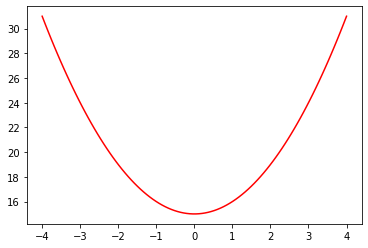

In [195]:
pred_y = x**2 + 15
plt.plot(x, pred_y, 'r')